In [1]:

import scipy.io as scio   # importing the scipy io module for reading the mat file
import numpy as np # importing numpy module for efficiently executing numerical
import matplotlib.pyplot as plt # import the pyplot from the matplotlib library
# from mpl_toolkits.basemap import Basemap # import the basemap to plot the data
from matplotlib import rcParams


dataFile = '/Users/jia/Documents/matlab/flash-grab/data/illusionSize/ContrastHierarchy/memorized_minor_adjust_behavior_illusion_size_contrast_annulus/huijiahan_2021_11_17_16_35.mat'

alldata = scio.loadmat(dataFile)
 # print(type(alldata))
data = alldata['data'] 
# print(data.shape)
back = alldata['back']
contrast = back['contrastratioMat'][0,0]
degree = data['wedgeMoveDegreeMat'][0,0]
direction = data['flashTiltDirection'][0,0]
 
print(degree.shape)
print(direction.shape)
print(contrast.shape)
# for row in val:




(20, 20)
(20, 20)
(1, 20)


In [2]:
%matplotlib inline
from pylab import *
import scipy.io as sio
import pandas as pd
import seaborn as sns
sns.set_context('talk')
plt.rc('axes.spines', top=False, right=False)

alldata = sio.loadmat(dataFile)
data = alldata['data']
degree = data['wedgeMoveDegreeMat'][0,0] # 刚读出来的degree是一个嵌套结构，拿出其中第一行第一列的元素，才是我们真正想要的数据
direction = data['flashTiltDirection'][0,0]
print(degree.shape, direction.shape)

(20, 20) (20, 20)


In [3]:
resp = zeros([len(contrast), 2])

for k, c in enumerate(contrast):
    for kd, d in enumerate([1, 2]):
        resp[k,kd] = mean(degree[k][direction[k]==d])
        print(resp)


[[-12.65   0.  ]]
[[-12.65  14.8 ]]


# A even better way

In [13]:
df = pd.DataFrame({'degree': degree.flat, 'direction': direction.flat, 'contrast': repeat(contrast, degree.shape[1])})
df

/Users/jia/anaconda3/lib/python3.6/site-packages/pandas/core/dtypes/dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


,degree,direction,contrast
0,15.0,2,0.06
1,16.5,2,0.06
2,13.5,2,0.06
3,15.5,2,0.06
4,13.0,2,0.06
5,-10.5,1,0.06
6,17.5,2,0.06
7,-17.5,1,0.06
8,-16.0,1,0.06
9,-11.5,1,0.06


[None]

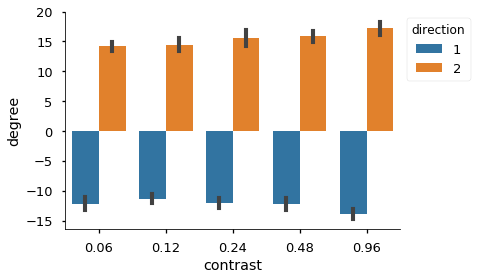

In [14]:
sns.barplot(data=df, y='degree', x='contrast', hue='direction')
setp(gca().legend_, bbox_to_anchor=[1,1])

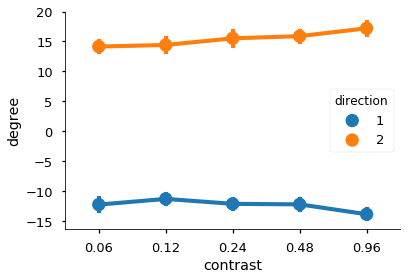

In [15]:
sns.pointplot(data=df, y='degree', x='contrast', hue='direction')